<a href="https://colab.research.google.com/github/MILIND-SEN/Coursera_Projects/blob/main/Capstone_Project_%E2%80%94_The_Battle_of_Neighborhoods_(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

In [ ]:
!pip install geocoder 
#print ("install geocoder")
#!conda install -c conda-forge/label/gcc7 geocoder --yes
#print ("install geocoder2")
#!conda install -c conda-forge/label/cf201901 geocoder --yes
#print ("install geocoder3")
#!conda install -c conda-forge/label/cf202003 geocoder --yes
#print ("install geocoder4")
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 98 kB 3.5 MB/s 
Folium installed
Libraries imported.


In [ ]:
CLIENT_ID = 'XXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXX


Data
Read and show all data used.
Read and show data Covid-19 cases per district.

In [ ]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00).csv")
# View the top rows of the dataset
df_cases

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN


Read and show the top 5 data rows from Covid-19 cases per district.

In [ ]:
df_cases.head()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN


Read and show the bottom 5 data rows from Covid-19 cases per district

In [ ]:
df_cases.tail()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
269,3101021001,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


Read and show the total population data in DKI Jakarta 2020.

In [ ]:
import pandas as pd
# Read in the data total population in DKI Jakarta 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/population2020_DKI_Jakarta.csv")
# View the top rows of the dataset
df_population

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409
5,Kep. Seribu,3334


Total population in Jakarta.

In [ ]:
df_population.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
print ("Total Polulation :", df_population['Total population 2020(people/km²)'].sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               6 non-null      object
 1   Total population 2020(people/km²)  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Total Polulation : 92736


Read and show the top 5 data rows from total population in DKI Jakarta, 2020.

In [ ]:
df_population.head()

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409


Read and show the data from 10 districts most pupulated in DKI Jakarta, 2020.

In [ ]:
# Read in the data 10 most pupulation in DKI Jakarta 2020 per district
df_most_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/10_kelurahan%20terpadat_DKI_Jakarta.csv")
# View the top rows of the dataset
df_most_population

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343
5,Utan_Panjang,69559
6,Jembatan_Besi,67874
7,Keagungan,67717
8,Kampung_Melayu,66594
9,Karang_Anyar,65141


Read and show the top 5 data rows from 10 most populated areas in DKI Jakarta, 2020 per district.

In [ ]:
df_most_population.head()

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343


According to the information update from Kompas.com (megapolitan.kompas.com), the following hospitals are the existing reference hospitals for Covid-19 testing in Jakarta area:
RSPI Sulianti Saroso, Jakarta Utara
RSUP Persahabatan, Jakarta Timur
RSPAD Gatot Soebroto, Jakarta Pusat
RSUP Fatmawati, Jakarta Selatan
RSU Bhayangkara, Jakarta Timur
RSAL Mintohardjo, Jakarta Pusat
RSUD Cengkareng, Jakarta Barat
RSUD Pasar Minggu, Jakarta Selatan
RSKD Duren Sawit, Jakarta Timur
RS Pelni, Jakarta Barat
RSUD Tarakan, Jakarta Pusat
RSUD Koja, Jakarta Utara
RSU Pertamina Jaya, Jakarta Pusat
Construct a Pandas data frame for subsequent data analysis.
Read and show Hospital data that provide treatment Covid-19.

In [ ]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Hospital%20for%20treatment%20covid-19.csv")
# View the top rows of the dataset
df_hospital

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang
6,RSUD Cengkareng,Jakarta Barat,Cengkareng
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit
9,RS Pelni,Jakarta Barat,Palmerah


Read and show the top 5 data rows from Hospital data providing treatment Covid-19.

In [ ]:
df_hospital.head()

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati


This sums up our data mining and data exploration section. In the following METHODOLOGY section, we will describe the process of how to do a ‘Visual’ approach to better understand our data using data science and data analytics tool kits.

Methodology
First, we create a new dataset of only positive cases from the Covid-19 Case table on May 28, 2020.

In [ ]:
df_cases.columns

Index(['ID_KEL', 'ID_KEL.1', 'Nama_provinsi', 'nama_kota', 'nama_kecamatan',
       'nama_kelurahan', 'ODP', 'Proses Pemantauan', 'Selesai Pemantauan',
       'PDP', 'Masih Dirawat', 'Pulang dan Sehat', 'POSITIF', 'Dirawat',
       'Sembuh', 'Meninggal', 'Self Isolation', 'Keterangan'],
      dtype='object')

Remove / drop irrelevant columns for this analysis.

In [ ]:
df_cases.drop(columns =["ID_KEL","ID_KEL.1", "Nama_provinsi", "nama_kecamatan", "ODP", "Proses Pemantauan", "Selesai Pemantauan", "PDP", "Masih Dirawat", "Pulang dan Sehat", "Dirawat", "Sembuh", "Meninggal", "Self Isolation", "Keterangan"], inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
1,BELUM DIKETAHUI,BELUM DIKETAHUI,539
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,1329
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17


In [ ]:
indexNames = df_cases[(df_cases['nama_kelurahan'] == 'BELUM DIKETAHUI') | (df_cases['nama_kota'] == 'LUAR DKI JAKARTA')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37


In [ ]:
df_cases.tail()

,nama_kota,nama_kelurahan,POSITIF
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2
269,KAB.ADM.KEP.SERIBU,PULAU UNTUNG JAWA,0


In [ ]:
# Rename columns name to English
df_cases = df_cases.rename(columns = {'nama_kota':'CITY', 'nama_kelurahan':'DISTRICT', 'POSITIF':'POSITIVE'})
df_cases

,CITY,DISTRICT,POSITIVE
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37
...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2


In [ ]:
# Get the number and the names of each municipality or city in Jakarta
df_cases['CITY'].unique()
print(df_cases['CITY'].unique())
np.array(['JAKARTA TIMUR', 'JAKARTA PUSAT', 'JAKARTA BARAT','JAKARTA SELATAN', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

[nan 'JAKARTA BARAT' 'JAKARTA SELATAN' 'JAKARTA UTARA' 'JAKARTA TIMUR'
 'JAKARTA PUSAT' 'KAB.ADM.KEP.SERIBU']


,POSITIVE
count,268.000000
mean,44.738806
std,422.522679
min,0.000000
25%,8.000000
50%,15.000000
75%,23.250000
max,6929.000000


Check if there are any missing or null values.

In [ ]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
df_cases['POSITIVE'].sum()

print ("positive cases :", ((df_cases['POSITIVE'].sum()) - 6929))
print()
# Group the data by CITY
df_cases_grp = df_cases.groupby(['CITY'])
df_cases_grp

df_cases_grp['POSITIVE'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 269
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      267 non-null    object
 1   DISTRICT  268 non-null    object
 2   POSITIVE  268 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB
positive cases : 5061



CITY
JAKARTA BARAT         1122
JAKARTA PUSAT          922
JAKARTA SELATAN        888
JAKARTA TIMUR         1162
JAKARTA UTARA          953
KAB.ADM.KEP.SERIBU      14
Name: POSITIVE, dtype: int64

Need to get Latitude & Longitude of Jakarta city and the districts

In [32]:
!pip install opencage
#lat=-6.1753942
#lng=106.827183
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)

from opencage.geocoder import OpenCageGeocode
key = "f27bc4ca7cbb4b5ebd3d882c1cb96506"
geocoder = OpenCageGeocode(key)
query = 'Jakarta, Indonesia'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']

print ('The Latitude and Longitude of Jakarta is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 reprectively.


Similarly, we can use the API service from OpenCage Geocoder to obtain the latitude and longitude of all districts in Jakarta.

In [33]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['DISTRICT']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.308763,106.897432
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.168293,106.904214
...,...,...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13,-5.803887,106.525306
266,JAKARTA BARAT,PINANGSIA,1,-6.135969,106.814264
267,JAKARTA SELATAN,SETIA BUDI,3,-6.207319,106.829340
268,JAKARTA BARAT,TAMBORA,2,-6.144766,106.808853


In [34]:
df_cases.head(10)

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.308763,106.897432
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.168293,106.904214
7,JAKARTA BARAT,TOMANG,42,-6.172725,106.797301
8,JAKARTA TIMUR,DUREN SAWIT,39,-6.234138,106.919247
9,JAKARTA BARAT,KALIDERES,41,-6.137006,106.701594
10,JAKARTA SELATAN,PONDOK PINANG,40,-6.275479,106.780403
11,JAKARTA TIMUR,PONDOK KELAPA,52,-6.241040,106.933153


Get the latitude and longitude Hospital
Besides, we also need to get the latitude and longitude of all Covid-19 testing centers in Jakarta that we have checked from the source

In [35]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.214620,106.845130
6,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734887
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.293560,106.820961
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.214620,106.845130
9,RS Pelni,Jakarta Barat,Palmerah,-6.193096,106.803975


We then need to know how to get a map of the city that we are interested in (i.e. Jakarta) to present our data to the stakeholders using a ‘Visualization’ approach.
We have downloaded all the required dependencies earlier in the report, and now we are ready to use the FOLIUM API service as described in the following section.

In [36]:
# Define the map object and then display using the specified latitude and longitude values
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=12)
map_jkt

The map shows the main outer ring roads surrounding the city of Jakarta. It does NOT, however, show the official territorial boundary of the city concerning other administrative regions in the east, west, and south of Jakarta.
However, because the author is from Indonesia, we know roughly which neighborhood belongs to Jakarta and which does not. In this scenario, we want to propose a strategic locations (i.e. neighborhood) for the investing group within the Jakarta governmental area.

Results
The chart below show the population density in Jakarta.


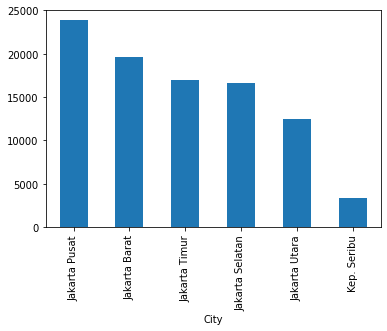

In [37]:
import matplotlib as plt

df_population.set_index('City')['Total population 2020(people/km²)'].plot.bar()

The chart below show the population density in Jakarta, per district

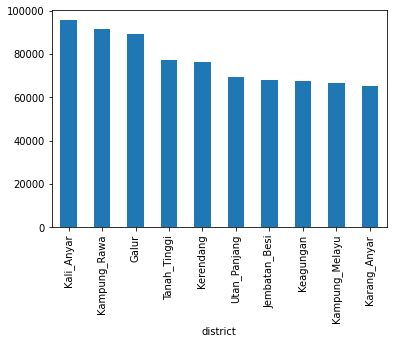

In [38]:
import matplotlib as plt

df_most_population.set_index('district')['Total population 2020 (people/km²)'].plot.bar()

Based on the graph results shown that areas need the distribution of masks the most is Central Jakarta (Jakarta Pusat) with the most populated areas. Then 5 districts that mostly need for a distribution of masks are Kali Anyar, Kampung Rawa, Galur, Tanah Tinggi, and Kerendang.
To better understand and estimate the territories or areas that are within the administrative government of Jakarta city, we need to plot all the districts that we have downloaded from the riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com site together with their latitude and longitude values. The following lines of Python code will execute the task using Folium API.

In [39]:
# Construct a map of all districts neighborhood in Jakarta 
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['DISTRICT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

As we can see from the above map, most of the districts are within the main outer ring roads surrounding the city, and others are situated outside the main ring roads. To solve in our business challenge, we need to show the extent and the distribution medical devices for treatment of COVID-19 positive case-patients within the city of Jakarta based on the number that we obtained from the government site. The following lines of Python code will achieve the task and present the data in a clear visual approach.

In [40]:
# Plot a map of Covid-19 distribution in the city of Jakarta per May 28, 2020
map_covid_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_jkt)
map_covid_jkt

This is a similar map plot that we can see from the government task force for Covid-19 cases in Jakarta. Their graph can be seen in this link: https://corona.jakarta.go.id/id/peta-persebaran. As we can see, most of the regions in Jakarta are now in the ‘RED’ zone, with the radius of the circle represent the relative extent of Covid-19 distribution in the City of Jakarta.
A better presentation of the data would be to use a ‘slider’ in the map that shows the growth of the circle day by day or simply an animation that shows the daily growth of Covid-19 cases in the city. An app developer might develop an App that alerts vehicles/road users that alerts that they are not allowed to pass the RED zone within the city. This App could save lives! The next set of problems that we need to solve is to show the location of existing and approved Covid-19 testing centers (or reference hospitals) and see how well they are distributed to each other within the city and in which regions of Jakarta. The following lines of Python code show how. We will first try to plot the hospitals WITHOUT the RED circles as that might cause distraction.

In [41]:
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
map_hosp = folium.Map(location=[-6.2, 106.8], zoom_start=12)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

As you can see, the hospitals are quite sparsely distributed within each other except the two hospitals in the south are relatively close to each other (i.e. Fatmawati and Pasar Minggu hospitals). Let’s see how strategic they are in accomodating the extent of positive cases patients in the city. We can do this by overlaying the two data within a single map as shown in the following codes:

In [42]:
# Plot a combined map of Covid-19 distribution in the city of Jakarta & current available testing centers
map_covid_hosp_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_jkt)
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_jkt)      
map_covid_hosp_jkt

**We can see from the results of the distribution of COVID-19 cases and the location of hospitals, almost all hospitals require a lot of medical equipment for COVID-19 treatment. In addition to Fatmawati hospital and the Pasar Minggu hospital, the distribution of the COVID-19 case is not as extensive as other hospitals.**

**Results and Discussion
The project aims to provide information to local people who must be alerted to go out of the house from the distribution of the COVID-19 case in Jakarta. It also aims to provide information on areas that are most needed for a lot of mask distribution, according to population density in the area.
Further, it provides information on which hospitals that need the most medical equipments for COVID-19 treatment, possibly even additional medical personnels (doctors and nurses). It also provides information on the business neighborhood which shall implement Covid-19 health protocol with a high discipline when “new normal” comes.**